In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

In [44]:
dataset = pd.read_csv("D:/IBM Machine Learning/FuelConsumptionCo2.csv")
dataset.head(10)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244
5,2014,ACURA,RLX,MID-SIZE,3.5,6,AS6,Z,11.9,7.7,10.0,28,230
6,2014,ACURA,TL,MID-SIZE,3.5,6,AS6,Z,11.8,8.1,10.1,28,232
7,2014,ACURA,TL AWD,MID-SIZE,3.7,6,AS6,Z,12.8,9.0,11.1,25,255
8,2014,ACURA,TL AWD,MID-SIZE,3.7,6,M6,Z,13.4,9.5,11.6,24,267
9,2014,ACURA,TSX,COMPACT,2.4,4,AS5,Z,10.6,7.5,9.2,31,212


In [32]:
dataset.shape

(1067, 13)

In [33]:
dataset.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


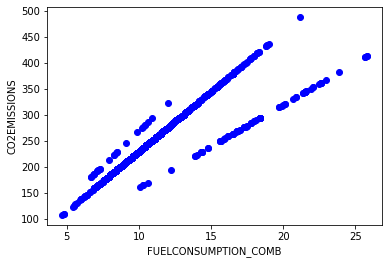

In [45]:
plt.scatter(dataset['FUELCONSUMPTION_COMB'],dataset['CO2EMISSIONS'],color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

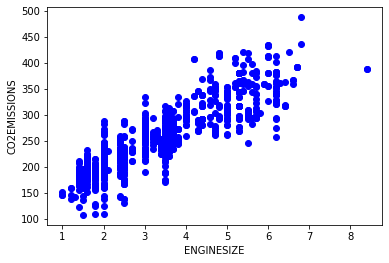

In [46]:
plt.scatter(dataset['ENGINESIZE'],dataset['CO2EMISSIONS'],color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [38]:
#x = dataset.iloc[:,:12]
#y = dataset.iloc[:,12]
#x_train,x_test, y_train,y_test = train_test_split(x,y,test_size = 0.2, random_state = 1)


In [54]:
msk = np.random.rand(len(dataset)) < 0.8
train = dataset[msk]
test = dataset[~msk]

x_train = np.asanyarray(train[['ENGINESIZE']])
y_train = np.asanyarray(train[['CO2EMISSIONS']])

x_test = np.asanyarray(test[['ENGINESIZE']])
y_test = np.asanyarray(test[['CO2EMISSIONS']])

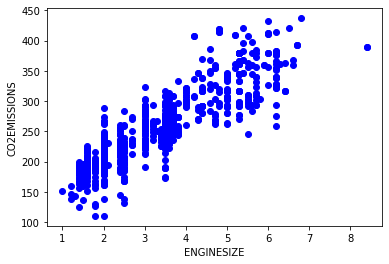

In [50]:
plt.scatter(x_train,y_train,color='blue')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')
plt.show()

In [51]:
l_reg = linear_model.LinearRegression()

l_reg.fit(train[['ENGINESIZE']],train[['CO2EMISSIONS']])

print("Coefficient = ",l_reg.coef_)
print("Intercept = ",l_reg.intercept_)

Coefficient =  [[38.49924609]]
Intercept =  [127.4625784]


Text(0, 0.5, 'CO2EMISSIONS')

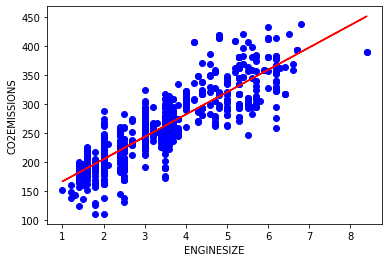

In [52]:
plt.scatter(x_train,y_train,color='blue')
plt.plot(x_train,l_reg.coef_[0][0] * x_train + l_reg.intercept_[0],'-r')
plt.xlabel('ENGINESIZE')
plt.ylabel('CO2EMISSIONS')

In [55]:
predictions = l_reg.predict(x_test)

MAE = np.mean(np.absolute(predictions - y_test))
MSE = MAE**2
r2 = r2_score(y_test,predictions)
print("MAE = ",MAE,"\nMSE = ",MSE,"\nR2 = ",r2)

MAE =  23.166724723834676 
MSE =  536.6971344299328 
R2 =  0.7739531292027548


D:\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
